In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('hexoskin_thorax_training_set.xlsx')
df

,Task_Label,insp_dur_mean,insp_dur_sd,exp_dur_mean,exp_dur_sd,insp_amp_mean,insp_amp_sd,exp_amp_mean,exp_amp_sd,insp_flow_mean,...,ie_ratio_sd,duty_cycle_mean,exp_diff_mean,RSP_Symmetry_PeakTrough,RRV_RMSSD,RSP_Rate_Mean,insp_minu_depth,exp_minu_depth,Participant,Classification
0,12.0a,1.651476,0.202622,1.683594,0.156604,28.383708,5.297158,28.011323,5.304442,17.055010,...,0.074256,0.492097,0.127790,0.544108,376.386712,17.890661,507.803298,501.141095,10785,0
1,12.0b,1.641059,0.087626,1.749512,0.152211,30.072616,2.361021,30.518982,2.676608,18.323961,...,0.057593,0.486992,0.201451,0.553490,351.137516,17.519191,526.847898,534.667875,10785,0
2,12.0c,2.121652,0.213602,2.283203,0.213642,41.450737,3.910462,41.865004,3.564286,19.637779,...,0.067618,0.476697,0.199219,0.553576,457.608476,14.258469,591.024066,596.930878,10785,0
3,12.0d,1.778460,0.094830,1.953683,0.213173,33.759091,2.710758,33.731867,2.535948,18.993236,...,0.082441,0.477750,0.285156,0.565102,439.827676,15.663059,528.770633,528.344215,10785,0
4,12.0e,2.011161,0.243663,2.149088,0.213828,36.289285,3.059318,36.535976,3.092634,18.140039,...,0.115349,0.481671,0.159375,0.552415,457.645154,14.412151,523.006669,526.562016,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,85,1.446875,0.122088,1.498828,0.200555,39.699081,5.263487,39.729357,7.984288,27.388412,...,0.108475,0.490259,0.203125,0.493820,334.175635,20.438000,811.369820,811.988602,98586,0
2900,87,1.492676,0.796249,2.233887,1.135998,30.169562,24.284886,29.676747,22.941076,18.792457,...,0.933998,0.408652,1.195871,0.439683,1022.081981,16.177357,488.063776,480.091336,98586,1
2901,89,1.421875,0.078178,1.456641,0.117894,36.352689,5.322750,35.461007,5.857152,25.509376,...,0.051696,0.496388,0.106337,0.513122,185.358320,21.246332,772.361307,753.416322,98586,0
2902,91,1.755208,0.529109,2.785156,1.447558,43.427075,19.078216,40.948934,19.147895,27.248072,...,0.283130,0.412197,2.145182,0.480321,3053.223554,14.493729,629.420250,593.502733,98586,1


In [3]:
# checking if there are NaN values in any column and if so, printing the associated Participant & Task_Label
for index, row in df.iterrows():
    if row.isnull().any():
        print(f"NaN value found in row {index}:")
        print(f"Participant: {row['Participant']}, Task_Label: {row['Task_Label']}")
        print(row)


            Feature  Mutual_Information
15    exp_diff_mean            0.305566
3        exp_dur_sd            0.291474
14  duty_cycle_mean            0.273512
17        RRV_RMSSD            0.255035
12    ie_ratio_mean            0.204101
9      insp_flow_sd            0.186464
7        exp_amp_sd            0.145561
5       insp_amp_sd            0.143572
13      ie_ratio_sd            0.125617
2      exp_dur_mean            0.122056


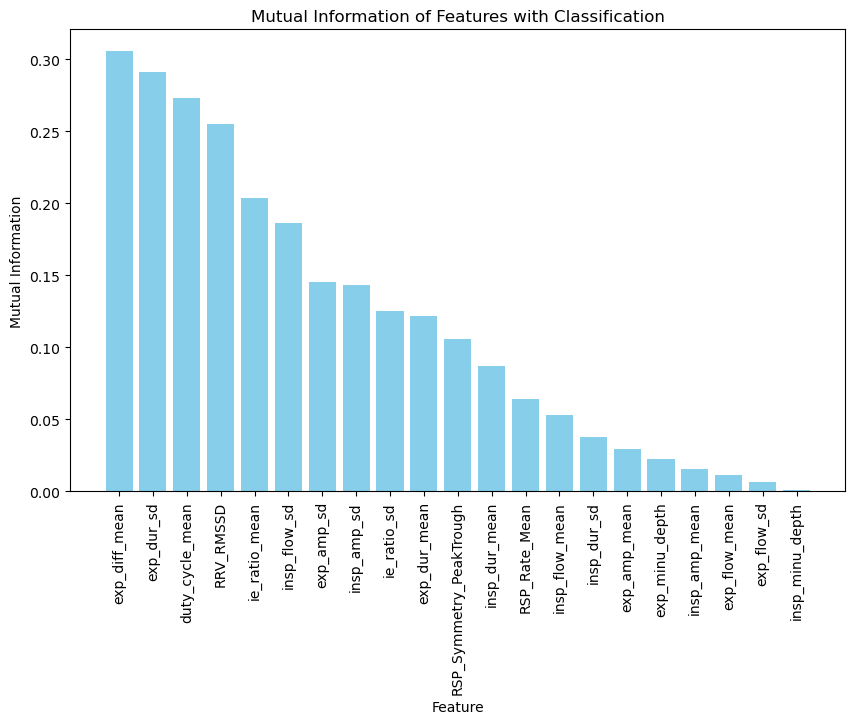

   exp_diff_mean  exp_dur_sd  duty_cycle_mean   RRV_RMSSD  ie_ratio_mean  \
0       0.127790    0.156604         0.492097  376.386712       0.971761   
1       0.201451    0.152211         0.486992  351.137516       0.950939   
2       0.199219    0.213642         0.476697  457.608476       0.913378   
3       0.285156    0.213173         0.477750  439.827676       0.918119   
4       0.159375    0.213828         0.481671  457.645154       0.936229   

   insp_flow_sd  exp_amp_sd  insp_amp_sd  ie_ratio_sd  exp_dur_mean  \
0      1.445912    5.304442     5.297158     0.074256      1.683594   
1      1.034691    2.676608     2.361021     0.057593      1.749512   
2      1.890795    3.564286     3.910462     0.067618      2.283203   
3      1.316481    2.535948     2.710758     0.082441      1.953683   
4      0.963488    3.092634     3.059318     0.115349      2.149088   

  Task_Label  Participant  Classification  
0      12.0a        10785               0  
1      12.0b        10785   

In [4]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [5]:
writer = pd.ExcelWriter('hexoskin_thorax_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_66832/1186602059.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
